In [ ]:
# Cargar los .npy y generar una variable para el test (1), train (4) y validation (4)
# que serán unas matrices de 5 dimensiones (480x100x3x60x1 (test), 240x100x3x60x1 (train) 80x100x3x60x1 (val))

In [1]:
import pandas as pd
import numpy as np
import math

from matplotlib import pyplot as plt
from numpy.random import RandomState
from sklearn.model_selection import KFold

In [2]:
dfs = pd.read_excel("Clasificador_señales.xlsx", index_col=0)
signal_name = dfs.index.tolist()

In [3]:
csv_read_test = "Clasificaciones/test.csv"
df_test = pd.read_csv(csv_read_test)
df_test = df_test.drop(['Unnamed: 0'], axis=1)

No jamming    45
Jamming       35
Name: Class, dtype: int64

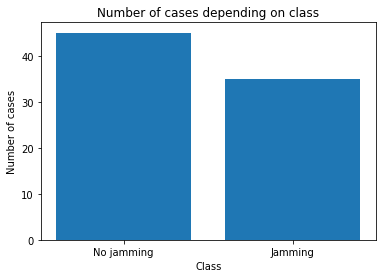

In [4]:
# Vemos el balanceo de nuestros datos

freq = dfs['Class'].value_counts()
display(freq)

plt.bar(['No jamming', 'Jamming'], freq)
plt.title('Number of cases depending on class')
plt.xlabel('Class')
plt.ylabel('Number of cases')
plt.show()

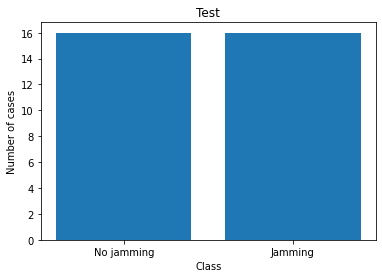

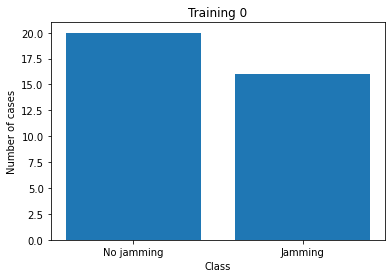

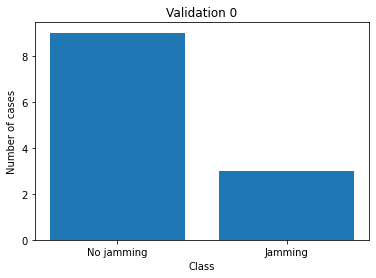

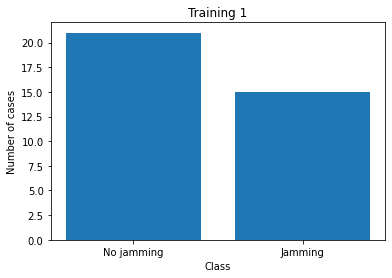

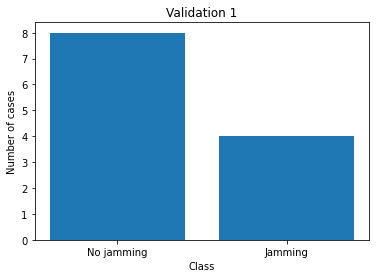

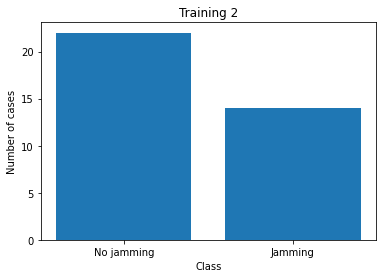

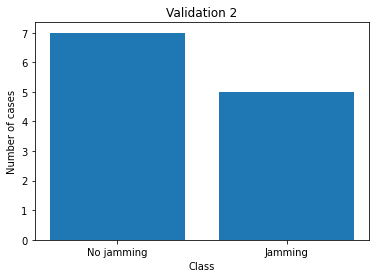

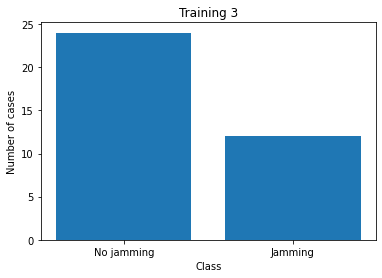

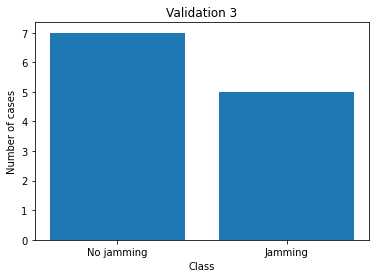

In [30]:
# No ejecutar, solo es necesario para generar 9 csv. Que son 4 de entrenamiento, 4 validación, 1 test
df_classif = pd.DataFrame(pd.read_excel("Clasificador_señales.xlsx"))
repetir = True

# Se repite cuando los datasets no están balanceados, tenemos un 56% de no jamming y un 44% de jamming
while(repetir == True):

    rng = RandomState()

    train_aux = df_classif.sample(frac=0.6, random_state=rng) # fracción del 60% train/val 40% test
    test = df_classif.loc[~df_classif.index.isin(train_aux.index)]
    
    # Comprobación de que estén balanceados los datasets
    freq_test = test['Class'].value_counts() 
    
    if (freq_test[0] > len(test)*0.6):
        repetir = True
    else:
        repetir = False

#print(f"Balanceo test:\n{freq_test}\n")

test = test.reset_index(drop=True)
str_save_test = "Clasificaciones/test.csv"
test.to_csv(str_save_test)
#print("TEST:\n", test)

plt.bar(['No jamming', 'Jamming'], freq_test)
plt.title('Test')
plt.xlabel('Class')
plt.ylabel('Number of cases')
plt.show()

X = train_aux

k = 4
kf = KFold(n_splits=k, random_state=None)

i = 0

for train_index, val_index in kf.split(X):
    repetir_tra = True
    repetir_val = True
    while((repetir_tra == True) and (repetir_val == True)):
        X_train , X_val = X.iloc[train_index,:], X.iloc[val_index,:]
        #y_train , y_test = y.iloc[train_index], y.iloc[test_index]

        train = X_train.reset_index(drop=True)
        validation = X_val.reset_index(drop=True)
        
        freq_tra = train['Class'].value_counts()
        if (freq_tra[0] > len(train)*0.6):
            repetir_tra = True
        else:
            repetir_tra = False
            
        freq_val = validation['Class'].value_counts()
        if (freq_val[0] > len(validation)*0.6):
            repetir_val = True
        else:
            repetir_val = False

    str_save_train = "Clasificaciones/train_" + str(i) + ".csv"
    train.to_csv(str_save_train)

    str_save_val = "Clasificaciones/validation_" + str(i) + ".csv"
    validation.to_csv(str_save_val)
    
    #print("TRAIN", i, ":\n", train)
    
    #print(f"\nBalanceo train {i}:\n{freq_tra}\n")
    
    plt.bar(['No jamming', 'Jamming'], freq_tra)
    plt.title(f'Training {i}')
    plt.xlabel('Class')
    plt.ylabel('Number of cases')
    plt.show()
    
    #print("VALIDATION", i,":\n", validation)
    
    #print(f"\nBalanceo valid {i}:\n{freq_val}\n")
    
    plt.bar(['No jamming', 'Jamming'], freq_val)
    plt.title(f'Validation {i}')
    plt.xlabel('Class')
    plt.ylabel('Number of cases')
    plt.show()
    
    i = i + 1    

In [6]:
# TEST
print("TEST")
csv_read_test = "Clasificaciones/test.csv"
df_test = pd.read_csv(csv_read_test)
df_test = df_test.drop(['Unnamed: 0'], axis=1)
display(df_test)

new_matrix = np.empty((len(df_test), 10, 100, 121), int)

for signal in (np.arange(0, len(df_test["Signal"]))):
    for index in range (0, 10): # Son 10 muestras por señal
        str_load = "Variables/" + df_test["Signal"][signal] + "_" + str(index) + ".npy"
        variable = np.load(str_load)
        new_matrix[signal][index] = variable
        
new_matrix_test = new_matrix.reshape((len(df_test), 10, 100, 121, 1)) # La redimensionamos para que sea 2x10x100x121x1
print(new_matrix_test.shape)        

np.save("Variables/matrix_test.npy", new_matrix_test)

TEST


,Signal,Class
0,AZ,No jamming
1,CZ,No jamming
2,EZ,No jamming
3,FZ,No jamming
4,HZ,No jamming
5,AA,Jamming
6,FA,No jamming
7,GA,No jamming
8,JA,No jamming
9,CB,Jamming


(32, 10, 100, 121, 1)


In [7]:
# TRAIN
csv_read_train = "Clasificaciones/train_0.csv"
df_train = pd.read_csv(csv_read_train)

new_matrix_train = np.empty((4, len(df_train), 10, 100, 121, 1), int)

print("TRAIN")
for i in range (0, 4):
    csv_read_train = "Clasificaciones/train_" + str(i) + ".csv"
    df_train = pd.read_csv(csv_read_train)
    df_train = df_train.drop(['Unnamed: 0'], axis=1)
    display(df_train)
    
    new_matrix = np.empty((len(df_train), 10, 100, 121), int)
    
    for signal in (np.arange(0, len(df_train["Signal"]))):
        for index in range (0, 10): # Son 10 muestras por señal
            str_load = "Variables/" + df_train["Signal"][signal] + "_" + str(index) + ".npy"
            variable = np.load(str_load)
            new_matrix[signal][index] = variable
            
    new_matrix_train[i] = new_matrix.reshape((len(df_train), 10, 100, 121, 1))#La redimensionamos para que sea 36x10x100x121x1

print(new_matrix_train.shape)             

np.save("Variables/matrix_train.npy", new_matrix_train)

TRAIN


,Signal,Class
0,IF,No jamming
1,GZ,No jamming
2,HC,No jamming
3,BA,Jamming
4,HA,No jamming
5,FG,Jamming
6,ED,Jamming
7,EA,No jamming
8,HD,No jamming
9,BD,Jamming


,Signal,Class
0,JC,No jamming
1,GD,No jamming
2,AB,Jamming
3,FE,Jamming
4,JG,No jamming
5,JZ,No jamming
6,JB,No jamming
7,FB,No jamming
8,IE,No jamming
9,HG,Jamming


,Signal,Class
0,JC,No jamming
1,GD,No jamming
2,AB,Jamming
3,FE,Jamming
4,JG,No jamming
5,JZ,No jamming
6,JB,No jamming
7,FB,No jamming
8,IE,No jamming
9,HG,Jamming


,Signal,Class
0,JC,No jamming
1,GD,No jamming
2,AB,Jamming
3,FE,Jamming
4,JG,No jamming
5,JZ,No jamming
6,JB,No jamming
7,FB,No jamming
8,IE,No jamming
9,HG,Jamming


(4, 36, 10, 100, 121, 1)


In [10]:
# VALIDATION
csv_read_valid = "Clasificaciones/validation_0.csv"
df_valid = pd.read_csv(csv_read_valid)

new_matrix_valid = np.empty((4, len(df_valid), 10, 100, 121, 1), int)

print("VALIDATION")
for i in range (0, 4):
    csv_read_valid = "Clasificaciones/validation_" + str(i) + ".csv"
    df_valid = pd.read_csv(csv_read_valid)
    df_valid = df_valid.drop(['Unnamed: 0'], axis=1)
    display(df_valid)
    
    new_matrix = np.empty((len(df_valid), 10, 100, 121), int)
    
    for signal in (np.arange(0, len(df_valid["Signal"]))):
        for index in range (0, 10): # Son 10 muestras por señal
            str_load = "Variables/" + df_valid["Signal"][signal] + "_" + str(index) + ".npy"
            variable = np.load(str_load)
            new_matrix[signal][index] = variable
            
    new_matrix_valid[i] = new_matrix.reshape((len(df_valid), 10, 100, 121, 1))#La redimensionamos para que sea 12x10x100x121x1
    
print(new_matrix_valid.shape)    

np.save("Variables/matrix_valid.npy", new_matrix_valid)

VALIDATION


,Signal,Class
0,JC,No jamming
1,GD,No jamming
2,AB,Jamming
3,FE,Jamming
4,JG,No jamming
5,JZ,No jamming
6,JB,No jamming
7,FB,No jamming
8,IE,No jamming
9,HG,Jamming


,Signal,Class
0,IF,No jamming
1,GZ,No jamming
2,HC,No jamming
3,BA,Jamming
4,HA,No jamming
5,FG,Jamming
6,ED,Jamming
7,EA,No jamming
8,HD,No jamming
9,BD,Jamming


,Signal,Class
0,CA,No jamming
1,AC,Jamming
2,EC,No jamming
3,IA,No jamming
4,AE,Jamming
5,BC,Jamming
6,CE,Jamming
7,IB,No jamming
8,DE,Jamming
9,DA,No jamming


,Signal,Class
0,BB,Jamming
1,CC,Jamming
2,DG,Jamming
3,AF,Jamming
4,IC,No jamming
5,DZ,No jamming
6,AD,Jamming
7,BZ,No jamming
8,AG,Jamming
9,JE,No jamming


(4, 12, 10, 100, 121, 1)


(36, 10, 100, 121, 1)
(360, 100, 121)
(360, 100, 121, 1)
(100, 121)


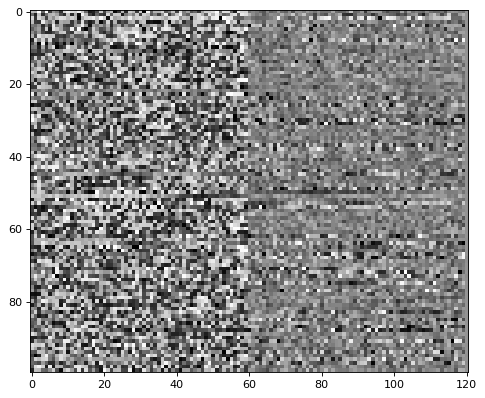

In [104]:
from matplotlib import pyplot as plt
import cv2

print(new_matrix_train[0].shape)
    
X_train = new_matrix_train[0].reshape(360, 100, 121)

print(X_train.shape)
    
X_train = np.expand_dims(X_train, axis=3)

print(X_train.shape)

img = X_train[34,:,:,0]

print(img.shape)

#cv2.imwrite('img_prueba.png',img)

plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.show()